## RNNs to analyze IMDB reviews


Load imdb reviews data through keras.datasets

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from keras.datasets import imdb
import pandas as pd
import numpy as np

In [15]:
vocabulary_size = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


Example review

In [45]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [53]:
mapping = imdb.get_word_index()
reverse_mapping = {idx:word for word,idx in mapping.items()}

In [210]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [211]:
take(10,mapping.items())

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [212]:
take(10,reverse_mapping.items())

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling')]

In [72]:
def decode_review(rev):
    decoded_rev = [reverse_mapping.get(idx-3, '[RES]') for idx in rev]
    return ' '.join(decoded_rev)

In [73]:
decode_review(X_train[0])

"[RES] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [RES] is an amazing actor and now the same being director [RES] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [RES] and would recommend it to everyone to watch and the fly [RES] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [RES] to the two little [RES] that played the [RES] of norman and paul they were just brilliant children are often left out of the [RES] list i think because the stars that play them all grown up are such a big [RES] for the whole film but these children are amazing and should be [RES] for what they 

In [108]:
def encode_review(rev):
    encoded_rev = [1] + ([mapping.get(idx)+3 for idx in rev])
    return encoded_rev

In [113]:
review = "this film was just brilliant"

In [114]:
review.split()

['this', 'film', 'was', 'just', 'brilliant']

In [115]:
encode_review(review.split())

[1, 14, 22, 16, 43, 530]

In [117]:
decode_review(encode_review(review.split()))

'[RES] this film was just brilliant'

Lets look at the length of each review

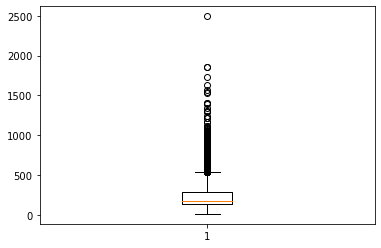

In [119]:
plt.boxplot([len(rev) for rev in X_train])
plt.show()

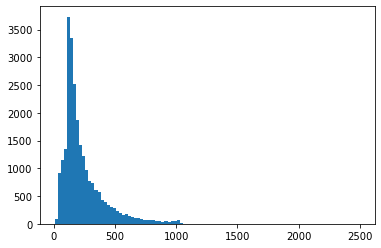

In [52]:
plt.hist([len(rev) for rev in X_train], bins=100)
plt.show()

### Padding reviews

To use these reviews as an input into the RNN, they must have the same length. We will pad the reviews shorter than 500 words with zeros and limit any review greater than 500 words.

In [120]:
from keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

### RNN model for sentiment analysis

Input : Sequence of words (integer representation of words (max_length = 500)) <br>
Output : (0 or 1)


In [163]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,Flatten

embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


RNN model with 1 embedding, 1 LSTM and 1 dense layers. <br>
213,301 parameters in total need to be trained.

### Train and evaluate our model

Specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics we'd like to measure. Specify the approprate parameters, including at least one metric 'accuracy'.

In [197]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

Once compiled, we can begin training our model. There are two important training parameters that we have to specify - batch size and number of training epochs, which together with our model architecture determine the total training time.

Training may take a while, took 20 mins for me with these parameters

In [198]:
batch_size = 64
num_epochs = 3

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
390/390 [==============================] - 415s 1s/step - loss: 0.4963 - accuracy: 0.7503 - val_loss: 0.2894 - val_accuracy: 0.8750
Epoch 2/3
390/390 [==============================] - 548s 1s/step - loss: 0.2864 - accuracy: 0.8854 - val_loss: 0.1921 - val_accuracy: 0.9375
Epoch 3/3
390/390 [==============================] - 498s 1s/step - loss: 0.2490 - accuracy: 0.9028 - val_loss: 0.2407 - val_accuracy: 0.9219


scores[1] will correspond to accuracy if we pass metrics=['accuracy']

In [199]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8754000067710876


In [200]:
scores

[0.3018021583557129, 0.8754000067710876]

In [201]:
preds = model.predict(X_test)

In [202]:
results = pd.DataFrame()

In [203]:
results['preds'] = list(preds)
results['label'] = list(y_test)

In [204]:
results

,preds,label
0,[0.10923827],0
1,[0.9837848],1
2,[0.80085593],1
3,[0.37180287],0
4,[0.9966775],1
...,...,...
24995,[0.99598515],1
24996,[0.7490025],1
24997,[0.06283751],0
24998,[0.11861637],0


In [205]:
review1 = "the movie is alright will definitely watch it again"
encoded_rev1 = encode_review(review1.split())
review2 = "utterly boring character development needs more work"
encoded_rev2 = encode_review(review2.split())
review3 = "this was a great movie"
encoded_rev3 = encode_review(review3.split())

In [206]:
example = sequence.pad_sequences([encoded_rev1,encoded_rev2,encoded_rev3],maxlen = 500)

In [208]:
model.predict(example)

array([[0.7824818 ],
       [0.13213482],
       [0.7397783 ]], dtype=float32)